In [1]:
import random

# Constants for the HEXA Stat system
CHANCES = {
    (0, 2): 0.35,  # Levels 0-2 (to reach 1-2)
    (2, 6): 0.20,  # Levels 2-6 (to reach 3-6)
    (6, 7): 0.15,  # Level 6 (to reach 7)
    (7, 8): 0.10,  # Level 7 (to reach 8)
    (8, 9): 0.05,  # Level 8 (to reach 9)
    (9, 10): 0.05  # Level 9 (to reach 10)
}

FRAGMENT_COSTS = [10, 10, 20, 20, 20, 20, 30, 40, 50] # Cost per level range

def get_success_rate(current_level):
    for (low, high), rate in CHANCES.items():
        if low <= current_level < high:
            return rate
    return 0.0  # Already at level 10

def simulate_one_attempt(target_level, strategy_table):
    """
    Simulates one full cycle of 20 enhancements or until a reset is triggered.
    """
    main_stat_level = 0
    fragments_used = 10 # Initial activation cost

    for step in range(1, 21):
        # 1. Check if we should reset based on strategy table
        # Strategy table: {step_count: min_required_level}
        if step in strategy_table:
            if main_stat_level < strategy_table[step]:
                return False, fragments_used, True # Failed, return fragments, was_reset=True

        # 2. Attempt Enhancement
        rate = get_success_rate(main_stat_level)
        fragments_used += 10 # Simplified cost; actual cost increases with level

        if random.random() < rate:
            main_stat_level += 1

        # 3. Check if target reached early (though unlikely for lvl 10)
        if main_stat_level >= target_level:
            return True, fragments_used, False

    return main_stat_level >= target_level, fragments_used, False

def run_simulation(trials, target_lvl, strategy):
    successes = 0
    total_fragments = 0
    total_resets = 0

    for _ in range(trials):
        success = False
        while not success:
            success, fragments, was_reset = simulate_one_attempt(target_lvl, strategy)
            total_fragments += fragments
            if not success:
                total_resets += 1
        successes += 1

    print(f"--- Results for Target Level {target_lvl} ---")
    print(f"Average Fragments: {total_fragments / trials:,.0f}")
    print(f"Average Resets: {total_resets / trials:.2f}")

# Example Strategy: Min level required at specific steps to reach Level 10
# This mimics the "Strategy Table" on the website
target_10_strategy = {
    10: 2, # Must be at least Level 2 by attempt 10
    15: 5, # Must be at least Level 5 by attempt 15
    18: 8  # Must be at least Level 8 by attempt 18
}

run_simulation(trials=10000, target_lvl=10, strategy=target_10_strategy)

KeyboardInterrupt: 

In [19]:
import random
from collections import Counter

def simulate_remaining_hexa(current_main, current_add1, current_add2):
    total_slots = 20
    main_lvl = current_main
    add1_lvl = current_add1
    add2_lvl = current_add2
    used_slots = main_lvl + add1_lvl + add2_lvl

    fragments_spent = 0

    def get_main_rate(lvl):
        if lvl < 2: return 0.35
        if lvl < 6: return 0.20
        if lvl == 6: return 0.15
        if lvl == 7: return 0.10
        if lvl < 10: return 0.05
        return 0.0

    def get_cost(lvl):
        if lvl < 2: return 10
        if lvl < 6: return 20
        if lvl == 6: return 30
        if lvl == 7: return 40
        if lvl < 10: return 50
        return 50 # Max cost cap

    for _ in range(total_slots - used_slots):
        fragments_spent += get_cost(main_lvl)
        main_rate = get_main_rate(main_lvl)

        roll = random.random()
        if roll < main_rate:
            main_lvl += 1
        elif roll < (main_rate + (1 - main_rate) / 2):
            add1_lvl += 1
        else:
            add2_lvl += 1

    return (main_lvl, add1_lvl, add2_lvl, fragments_spent)

def run_optimizer(c_main, c_add1, c_add2, trials=1000000, fragment_price=0.25):
    results = []
    for _ in range(trials):
        results.append(simulate_remaining_hexa(c_main, c_add1, c_add2))

    # Extraction
    main_stats = [r[0] for r in results]
    add1_stats = [r[1] for r in results]
    add2_stats = [r[2] for r in results]
    costs = [r[3] for r in results]

    main_counts = Counter(main_stats)
    avg_main = sum(main_stats) / trials
    avg_add1 = sum(add1_stats) / trials
    avg_add2 = sum(add2_stats) / trials
    avg_fragments = sum(costs) / trials

    print(f"--- Optimization Results from (Main:Lv{c_main}, Sub1:Lv{c_add1}, Sub2:Lv{c_add2}) ---")
    print(f"Remaining clicks: {20 - (c_main + c_add1 + c_add2)}")

    print("\n[Main Stat Probability]")
    print(f"Main Final Level (Avg): {avg_main:.2f}")

    for lvl in sorted(main_counts.keys()):
        prob = (main_counts[lvl] / trials) * 100
        print(f"Level {lvl}: {prob:.2f}%")

    print(f"\n[Additional Stats Expectation]")
    print(f"Sub1 Final Level (Avg): {avg_add1:.2f}")
    print(f"Sub2 Final Level (Avg): {avg_add2:.2f}")

    print(f"\n[Expected Remaining Cost]")
    print(f"Avg Fragments needed: {avg_fragments:,.0f}")
    print(f"Estimated Mesos(B): {avg_fragments * fragment_price:,.0f} (at {fragment_price:,.2f}/ea)")

# Example use:
run_optimizer(c_main=5, c_add1=0, c_add2=0)

--- Optimization Results from (Main:Lv5, Sub1:Lv0, Sub2:Lv0) ---
Remaining clicks: 15

[Main Stat Probability]
Main Final Level (Avg): 7.16
Level 5: 3.53%
Level 6: 20.85%
Level 7: 39.85%
Level 8: 28.97%
Level 9: 5.91%
Level 10: 0.89%

[Additional Stats Expectation]
Sub1 Final Level (Avg): 6.42
Sub2 Final Level (Avg): 6.42

[Expected Remaining Cost]
Avg Fragments needed: 469
Estimated Mesos(B): 117 (at 0.25/ea)


--- Optimization Results (Start: 3/5/4) ---
Main Avg: 4.87 | Sub1 Avg: 8.01 | Sub2 Avg: 7.11
Exp. Fragments: 166 | Est. Cost: 41.49B



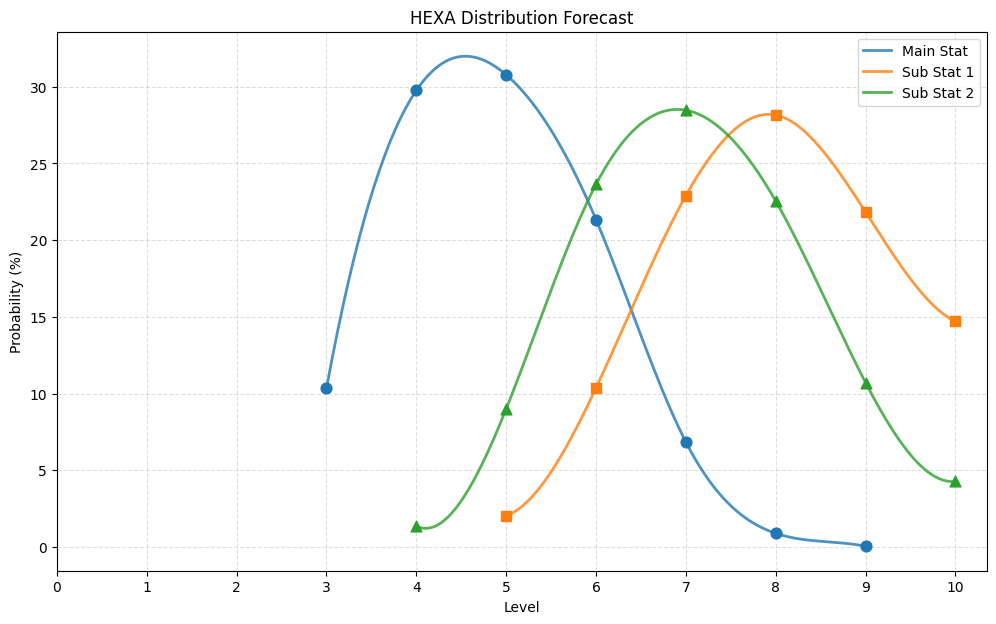

In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.interpolate import make_interp_spline

def simulate_remaining_hexa(current_main, current_add1, current_add2):
    total_slots = 20
    main_lvl = current_main
    add1_lvl = current_add1
    add2_lvl = current_add2
    used_slots = main_lvl + add1_lvl + add2_lvl

    fragments_spent = 0

    def get_main_rate(lvl):
        if lvl >= 10: return 0.0  # Hard cap
        if lvl < 2: return 0.35
        if lvl < 6: return 0.20
        if lvl == 6: return 0.15
        if lvl == 7: return 0.10
        if lvl < 10: return 0.05
        return 0.0

    def get_cost(lvl):
        # Cost is based on current main level per attempt
        if lvl < 2: return 10
        elif lvl < 6: return 20
        elif lvl == 6: return 30
        elif lvl == 7: return 40
        else: return 50

    for _ in range(total_slots - used_slots):
        fragments_spent += get_cost(main_lvl)

        # 1. Get current available rates
        m_rate = get_main_rate(main_lvl)
        s1_rate = 0.325 if add1_lvl < 10 else 0.0
        s2_rate = 0.325 if add2_lvl < 10 else 0.0

        # 2. Redistribute probability (Normalization)
        # If a stat is maxed, its probability is shared by the others
        total_weight = m_rate + s1_rate + s2_rate

        if total_weight <= 0: break # All stats reached 10

        roll = random.random() * total_weight

        if roll < m_rate:
            main_lvl += 1
        elif roll < (m_rate + s1_rate):
            add1_lvl += 1
        else:
            add2_lvl += 1

    return (main_lvl, add1_lvl, add2_lvl, fragments_spent)

def run_full_optimizer(c_main, c_add1, c_add2, trials=10000, fragment_price=0.25):
    results = [simulate_remaining_hexa(c_main, c_add1, c_add2) for _ in range(trials)]

    # Data extraction
    main_res = [r[0] for r in results]
    add1_res = [r[1] for r in results]
    add2_res = [r[2] for r in results]
    costs = [r[3] for r in results]

    # Statistical analysis
    main_counts = Counter(main_res)
    add1_counts = Counter(add1_res)
    add2_counts = Counter(add2_res)

    print(f"--- Optimization Results (Start: {c_main}/{c_add1}/{c_add2}) ---")
    print(f"Main Avg: {np.mean(main_res):.2f} | Sub1 Avg: {np.mean(add1_res):.2f} | Sub2 Avg: {np.mean(add2_res):.2f}")
    print(f"Exp. Fragments: {np.mean(costs):,.0f} | Est. Cost: {np.mean(costs)*fragment_price:.2f}B\n")

    # Visualization
    plt.figure(figsize=(12, 7))
    labels = ['Main Stat', 'Sub Stat 1', 'Sub Stat 2']
    data_sources = [main_counts, add1_counts, add2_counts]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    markers = ['o', 's', '^']

    for i, counts in enumerate(data_sources):
        x = np.array(sorted(counts.keys()))
        y = np.array([counts[lvl] / trials * 100 for lvl in x])

        # Smoothing logic
        if len(x) > 3:
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spl = make_interp_spline(x, y, k=3)
            y_smooth = np.clip(spl(x_smooth), 0, None)
            plt.plot(x_smooth, y_smooth, color=colors[i], label=labels[i], linewidth=2, alpha=0.8)

        plt.scatter(x, y, color=colors[i], marker=markers[i], s=60, zorder=5)

    plt.title(f"HEXA Distribution Forecast")
    plt.xlabel("Level")
    plt.ylabel("Probability (%)")
    plt.xticks(range(0, 11))
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.show()

# Run the final simulation
run_full_optimizer(c_main=3, c_add1=5, c_add2=4)

In [79]:
import random
import numpy as np

def simulate_remaining_hexa(current_stats):
    main_lvl, add1_lvl, add2_lvl = current_stats
    total_slots = 20
    used_slots = main_lvl + add1_lvl + add2_lvl
    fragments_spent = 0

    def get_main_rate(lvl):
        if lvl >= 10: return 0.0
        rates = {0: 0.35, 1: 0.35, 2: 0.20, 3: 0.20, 4: 0.20, 5: 0.20, 6: 0.15, 7: 0.10, 8: 0.05, 9: 0.05}
        return rates.get(lvl, 0.0)

    def get_cost(lvl):
        if lvl < 2: return 10
        elif lvl < 6: return 20
        elif lvl == 6: return 30
        elif lvl == 7: return 40
        else: return 50

    for _ in range(total_slots - used_slots):
        fragments_spent += get_cost(main_lvl)
        m_rate = get_main_rate(main_lvl)
        s1_rate = 0.325 if add1_lvl < 10 else 0.0
        s2_rate = 0.325 if add2_lvl < 10 else 0.0

        total_weight = m_rate + s1_rate + s2_rate
        if total_weight <= 0: break

        roll = random.random() * total_weight
        if roll < m_rate:
            main_lvl += 1
        elif roll < (m_rate + s1_rate):
            add1_lvl += 1
        else:
            add2_lvl += 1

    return main_lvl, add1_lvl, add2_lvl, fragments_spent

def run_decision_advisor_fixed(c_main, c_add1, c_add2, target_main=None, target_sub=None, trials=100000, fragment_price=0.25):

    # Helper function to check success based on provided targets
    def check_success(m, s1, s2):
        # If target is None or 0, that condition is treated as 'False' so it doesn't affect the OR
        m_success = (m >= target_main) if target_main else False
        s1_success = (s1 >= target_sub) if target_sub else False
        s2_success = (s2 >= target_sub) if target_sub else False
        return m_success or s1_success or s2_success

    # 1. Calculate Baseline
    baseline_successes = 0
    baseline_costs_all = []

    for _ in range(trials):
        m, s1, s2, cost = simulate_remaining_hexa((0,0,0))
        total_cost = cost + 10
        baseline_costs_all.append(total_cost)
        if check_success(m, s1, s2):
            baseline_successes += 1

    prob_baseline = baseline_successes / trials
    expected_total_baseline = np.mean(baseline_costs_all) / prob_baseline if prob_baseline > 0 else float('inf')

    # 2. Evaluate Current State
    current_successes = 0
    current_costs_remaining = []

    for _ in range(trials):
        m, s1, s2, cost = simulate_remaining_hexa((c_main, c_add1, c_add2))
        current_costs_remaining.append(cost)
        if check_success(m, s1, s2):
            current_successes += 1

    prob_current = current_successes / trials
    avg_remaining_fragments = np.mean(current_costs_remaining)

    if prob_current > 0:
        expected_total_from_current = avg_remaining_fragments + ((1 - prob_current) / prob_current) * expected_total_baseline
    else:
        expected_total_from_current = float('inf')

    # 3. Output
    target_str = f"Main {target_main}+" if target_main else ""
    if target_sub:
        target_str += (" OR " if target_str else "") + f"Sub {target_sub}+"

    print(f"--- HEXA ADVISOR: {target_str} ---")
    print(f"Current Stats: ({c_main}, {c_add1}, {c_add2})")
    print("-" * 40)
    print(f"Baseline Win Rate: {prob_baseline*100:.2f}%")
    print(f"Current Win Rate: {prob_current*100:.2f}%")
    print("-" * 40)
    print(f"Exp. total fragments (Current path): {expected_total_from_current:.1f}")
    print(f"Exp. total fragments (Fresh start): {expected_total_baseline:.1f}")
    print(f"Estimated Meso Cost: {expected_total_from_current * fragment_price:.2f}B")
    print("-" * 40)

    if prob_current >= prob_baseline:
        print(f">>> ADVICE: KEEP PRESSING <<<")
    else:
        print(f">>> ADVICE: RESET NOW <<<")

# Example: Only Main > 7
run_decision_advisor_fixed(c_main=3, c_add1=8, c_add2=0, target_main=7, target_sub=None)

--- HEXA ADVISOR: Main 7+ ---
Current Stats: (3, 8, 0)
----------------------------------------
Baseline Win Rate: 22.58%
Current Win Rate: 23.04%
----------------------------------------
Exp. total fragments (Current path): 5817.5
Exp. total fragments (Fresh start): 1683.1
Estimated Meso Cost: 1454.37B
----------------------------------------
>>> ADVICE: KEEP PRESSING <<<


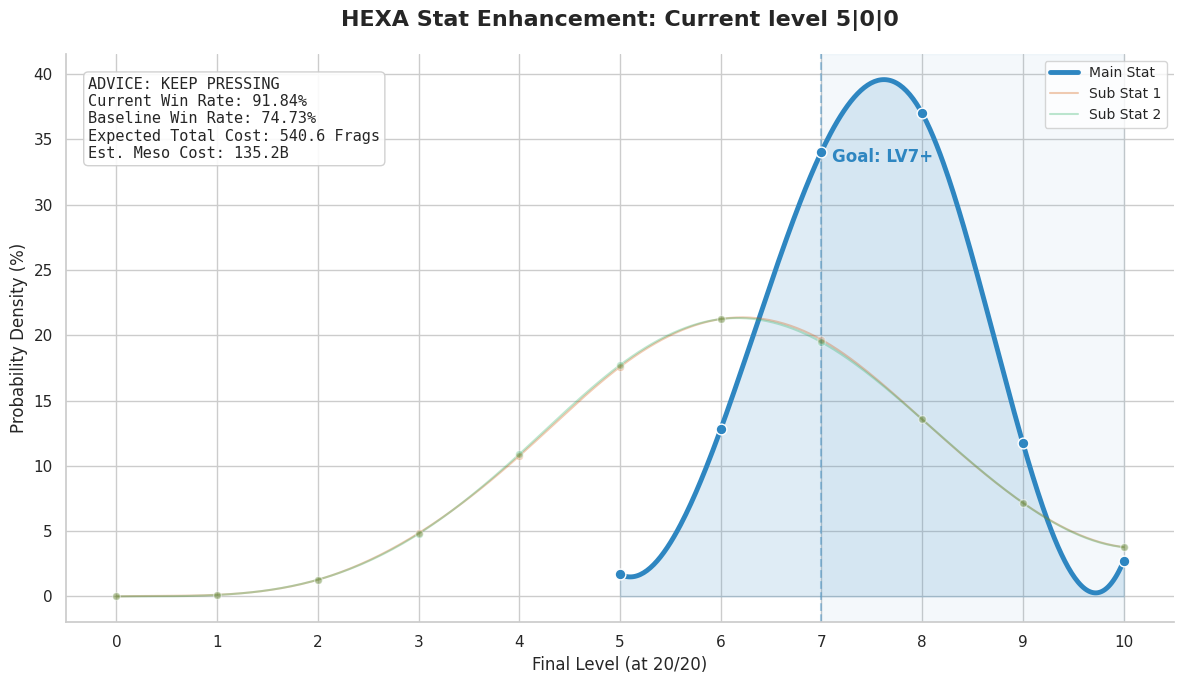

In [97]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from collections import Counter

# --- CORE SIMULATION LOGIC ---
def simulate_remaining_hexa(current_stats):
    main_lvl, add1_lvl, add2_lvl = current_stats
    total_slots = 20
    used_slots = main_lvl + add1_lvl + add2_lvl
    fragments_spent = 0

    def get_main_rate(lvl):
        if lvl >= 10: return 0.0
        rates = {0: 0.35, 1: 0.35, 2: 0.20, 3: 0.20, 4: 0.20, 5: 0.20, 6: 0.15, 7: 0.10, 8: 0.05, 9: 0.05}
        return rates.get(lvl, 0.0)

    def get_cost(lvl):
        if lvl < 2: return 10
        elif lvl < 6: return 20
        elif lvl == 6: return 30
        elif lvl == 7: return 40
        else: return 50

    for _ in range(total_slots - used_slots):
        fragments_spent += get_cost(main_lvl)
        m_rate = get_main_rate(main_lvl)
        s1_rate = 0.325 if add1_lvl < 10 else 0.0
        s2_rate = 0.325 if add2_lvl < 10 else 0.0

        total_weight = m_rate + s1_rate + s2_rate
        if total_weight <= 0: break

        roll = random.random() * total_weight
        if roll < m_rate:
            main_lvl += 1
        elif roll < (m_rate + s1_rate):
            add1_lvl += 1
        else:
            add2_lvl += 1

    return main_lvl, add1_lvl, add2_lvl, fragments_spent

# --- ADVISOR & VISUALIZATION ---
def run_pro_hexa_advisor(c_main, c_add1, c_add2, target_main=None, target_sub=None, trials=100000, fragment_price=0.25):
    def check_success(m, s1, s2):
        m_success = (m >= target_main) if target_main else False
        s1_success = (s1 >= target_sub) if target_sub else False
        s2_success = (s2 >= target_sub) if target_sub else False
        return m_success or s1_success or s2_success

    # 1. Background Calculations
    results = [simulate_remaining_hexa((c_main, c_add1, c_add2)) for _ in range(trials)]
    baseline_results = [simulate_remaining_hexa((0,0,0)) for _ in range(trials)]

    prob_baseline = sum(1 for r in baseline_results if check_success(r[0], r[1], r[2])) / trials
    avg_fresh_cost = np.mean([r[3] + 10 for r in baseline_results])
    expected_total_baseline = avg_fresh_cost / prob_baseline if prob_baseline > 0 else float('inf')

    main_res, s1_res, s2_res, costs_rem = zip(*results)
    success_count = sum(1 for r in results if check_success(r[0], r[1], r[2]))
    prob_current = success_count / trials
    expected_total_current = np.mean(costs_rem) + ((1 - prob_current) / prob_current) * expected_total_baseline if prob_current > 0 else float('inf')

    # 2. Professional Plotting
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 7))

    stats_data = {
        'Main Stat': (main_res, '#2E86C1', 3.5, 1.0, True),  # (data, color, lw, alpha, fill)
        'Sub Stat 1': (s1_res, '#D35400', 1.5, 0.3, False),
        'Sub Stat 2': (s2_res, '#27AE60', 1.5, 0.3, False)
    }

    for label, (res_data, color, lw, alpha, should_fill) in stats_data.items():
        counts = Counter(res_data)
        x = np.array(sorted(counts.keys()))
        y = np.array([counts[lvl] / trials * 100 for lvl in x])

        if len(x) > 3:
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spl = make_interp_spline(x, y, k=3)
            y_smooth = np.clip(spl(x_smooth), 0, None)

            ax.plot(x_smooth, y_smooth, label=label, color=color, linewidth=lw, alpha=alpha)
            if should_fill:
                ax.fill_between(x_smooth, y_smooth, alpha=0.15, color=color)

        ax.scatter(x, y, color=color, s=60 if lw > 2 else 30, edgecolors='white', zorder=5, alpha=alpha)

    # 3. Success Zone Annotation
    if target_main:
        ax.axvline(x=target_main, color='#2E86C1', linestyle='--', alpha=0.4)
        ax.axvspan(target_main, 10, color='#2E86C1', alpha=0.05)
        ax.text(target_main+0.1, ax.get_ylim()[1]*0.8, f'Goal: LV{target_main}+', color='#2E86C1', fontweight='bold')

    # 4. Summary Info Box
    advice = "KEEP PRESSING" if prob_current >= prob_baseline else "RESET NOW"
    info_text = (
        f"ADVICE: {advice}\n"
        f"Current Win Rate: {prob_current*100:.2f}%\n"
        f"Baseline Win Rate: {prob_baseline*100:.2f}%\n"
        f"Expected Total Cost: {expected_total_current:.1f} Frags\n"
        f"Est. Meso Cost: {expected_total_current * fragment_price:.1f}B"
    )

    props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#CCCCCC')
    ax.text(0.02, 0.96, info_text, transform=ax.transAxes, fontsize=11, family='monospace',
            verticalalignment='top', bbox=props)

    # Titles and Styling
    ax.set_title(f"HEXA Stat Enhancement: Current level {c_main}|{c_add1}|{c_add2}", fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Final Level (at 20/20)", fontsize=12)
    ax.set_ylabel("Probability Density (%)", fontsize=12)
    plt.xticks(range(0, 11))
    plt.legend(frameon=True, loc='upper right', fontsize=10)
    sns.despine()

    plt.tight_layout()
    plt.show()

# --- INPUT SECTION ---
run_pro_hexa_advisor(
    c_main=5,
    c_add1=0,
    c_add2=0,
    target_main=7, target_sub=9,
    trials=100000, fragment_price=0.25
)

In [68]:
import random
import numpy as np
from collections import Counter

class HexaSimulator:
    def __init__(self, target_main, target_sub=0, trials=100000):
        self.target_main = target_main
        self.target_sub = target_sub
        self.trials = trials
        self.activation_cost = 10

    def get_main_rate(self, lvl):
        if lvl >= 10: return 0.0
        # Official MapleStory HEXA Stat rates
        rates = {0: 0.35, 1: 0.35, 2: 0.20, 3: 0.20, 4: 0.20,
                 5: 0.20, 6: 0.15, 7: 0.10, 8: 0.05, 9: 0.05}
        return rates.get(lvl, 0.0)

    def get_upgrade_cost(self, lvl):
        if lvl < 2: return 10
        if lvl < 6: return 20
        if lvl == 6: return 30
        if lvl == 7: return 40
        return 50

    def simulate_core(self, start_stats):
        m, s1, s2 = list(start_stats)
        total_frags = 0
        used_slots = m + s1 + s2

        for _ in range(20 - used_slots):
            total_frags += self.get_upgrade_cost(m)

            m_rate = self.get_main_rate(m)
            remaining_prob = 1.0 - m_rate

            s1_open = s1 < 10
            s2_open = s2 < 10

            if s1_open and s2_open:
                s1_rate = remaining_prob / 2
            elif s1_open:
                s1_rate = remaining_prob
            elif s2_open:
                s1_rate = 0.0
            else:
                s1_rate = 0.0
                m_rate = 1.0

            roll = random.random()
            if roll < m_rate:
                m += 1
            elif roll < (m_rate + s1_rate):
                s1 += 1
            else:
                s2 += 1

        main_hit = (m >= self.target_main)
        sub_hit = (self.target_sub > 0) and (s1 >= self.target_sub or s2 >= self.target_sub)

        return m, s1, s2, total_frags, (main_hit or sub_hit)

    def run_analysis(self, current_stats):
        assert all(0 <= stat <= 10 for stat in current_stats)
        assert sum(current_stats) <= 20

        # 1. Baseline Analysis
        base_results = [self.simulate_core((0, 0, 0)) for _ in range(self.trials)]

        p_base_main = sum(1 for r in base_results if r[0] >= self.target_main) / self.trials
        p_base_sub = sum(1 for r in base_results if (self.target_sub > 0 and (r[1] >= self.target_sub or r[2] >= self.target_sub))) / self.trials
        p_base_total = sum(1 for r in base_results if r[4]) / self.trials

        avg_base_attempt_cost = np.mean([r[3] for r in base_results]) + self.activation_cost
        e_baseline = avg_base_attempt_cost / p_base_total if p_base_total > 0 else float('inf')

        # 2. Current Path Analysis
        cur_results = [self.simulate_core(current_stats) for _ in range(self.trials)]

        p_cur_main = sum(1 for r in cur_results if r[0] >= self.target_main) / self.trials
        p_cur_sub = sum(1 for r in cur_results if (self.target_sub > 0 and (r[1] >= self.target_sub or r[2] >= self.target_sub))) / self.trials
        p_cur_total = sum(1 for r in cur_results if r[4]) / self.trials

        avg_cur_rem_cost = np.mean([r[3] for r in cur_results])

        # 3. Cost Efficiency
        e_current = avg_cur_rem_cost + ((1 - p_cur_total) * e_baseline)

        return {
            "p_cur_total": p_cur_total, "p_cur_main": p_cur_main, "p_cur_sub": p_cur_sub,
            "p_base_total": p_base_total, "p_base_main": p_base_main, "p_base_sub": p_base_sub,
            "e_current": e_current, "e_baseline": e_baseline,
            "avg_rem_cost": avg_cur_rem_cost, "avg_base_attempt": avg_base_attempt_cost,
            "final_stats": [(r[0], r[1], r[2]) for r in cur_results]
        }

def get_mode_stats(final_stats):
    # Calculate Mode for Main, Sub1, Sub2 individually
    main_counts = Counter([r[0] for r in final_stats])
    s1_counts = Counter([r[1] for r in final_stats])
    s2_counts = Counter([r[2] for r in final_stats])

    m_mode = main_counts.most_common(1)[0]
    s1_mode = s1_counts.most_common(1)[0]
    s2_mode = s2_counts.most_common(1)[0]

    # Calculate most common overall Triplet
    triplet_counts = Counter(final_stats)
    triplet_mode = triplet_counts.most_common(1)[0]

    return m_mode, s1_mode, s2_mode, triplet_mode

def print_report(stats, target_main, target_sub, price):
    print(f"Running simulation ({100000} trials)...")
    sim = HexaSimulator(target_main, target_sub, trials=100000)
    data = sim.run_analysis(stats)

    slots = sum(stats)
    advice = "KEEP ENHANCING"
    adv_col = "GREEN"

    if slots == 0:
        advice = "START ENHANCING"
    elif slots <= 3:
        if data['p_cur_total'] < (data['p_base_total'] * 0.7):
            advice = "RESTART (Bad Start)"
            adv_col = "RED"
    elif data['e_current'] > data['e_baseline']:
        advice = "RESTART CORE"
        adv_col = "RED"

    print("\n" + "="*60)
    print(f" HEXA STAT ADVISOR | Current: {stats}")
    print(f" Goal: Main {target_main}+" + (f" OR Sub {target_sub}+" if target_sub > 0 else ""))
    print("="*60)
    print(f"RECOMMENDATION: [{adv_col}] {advice}")
    print("-" * 60)

    print(f"• Current Win Rate:   {data['p_cur_total']*100:.2f}%")
    if target_sub > 0:
        print(f"  └─ Reach Main {target_main}+: {data['p_cur_main']*100:.2f}%")
        print(f"  └─ Reach Sub {target_sub}+:  {data['p_cur_sub']*100:.2f}%")

    print(f"• Baseline Win Rate:  {data['p_base_total']*100:.2f}%")
    if target_sub > 0:
        print(f"  └─ Reach Main {target_main}+: {data['p_base_main']*100:.2f}%")
        print(f"  └─ Reach Sub {target_sub}+:  {data['p_base_sub']*100:.2f}%")

    print("-" * 60)
    print("MOST LIKELY OUTCOMES (Mode):")

    m_mode, s1_mode, s2_mode, tri_mode = get_mode_stats(data['final_stats'])
    total_trials = len(data['final_stats'])

    print(f"• Main Stat: Likely Level {m_mode[0]} (Occurs in {m_mode[1]/total_trials*100:.1f}% of runs)")
    print(f"• Sub Stat 1: Likely Level {s1_mode[0]} (Occurs in {s1_mode[1]/total_trials*100:.1f}% of runs)")
    print(f"• Sub Stat 2: Likely Level {s2_mode[0]} (Occurs in {s2_mode[1]/total_trials*100:.1f}% of runs)")
    print(f"• Most Common Result: {tri_mode[0]} (Occurs in {tri_mode[1]/total_trials*100:.1f}% of runs)")

    print("-" * 60)
    print(f"TOTAL EXPECTED COST (fragments):")
    print(f"1. Keep Current: {data['e_current']:.0f}")
    print(f"2. Restart Now:  {data['e_baseline']:.0f}")

    diff = data['e_current'] - data['e_baseline']
    if diff > 0 and slots > 0:
        print(f"\n>> SAVINGS: Restarting saves ~{diff:.0f} fragments ({diff*price:.2f}B Mesos)")
    elif slots > 0:
        print(f"\n>> SAVINGS: Keeping this core saves ~{abs(diff):.0f} fragments vs restarting.")

# --- RUN IT ---
# Example: Current (7, 5, 5), Goal Main 9 OR Sub 10
print_report((6, 6, 3), 9, 10, 0.25)

Running simulation (100000 trials)...

 HEXA STAT ADVISOR | Current: (6, 6, 3)
 Goal: Main 9+ OR Sub 10+
RECOMMENDATION: [RED] RESTART CORE
------------------------------------------------------------
• Current Win Rate:   11.67%
  └─ Reach Main 9+: 0.62%
  └─ Reach Sub 10+:  11.04%
• Baseline Win Rate:  37.02%
  └─ Reach Main 9+: 0.29%
  └─ Reach Sub 10+:  36.73%
------------------------------------------------------------
MOST LIKELY OUTCOMES (Mode):
• Main Stat: Likely Level 7 (Occurs in 44.3% of runs)
• Sub Stat 1: Likely Level 8 (Occurs in 34.6% of runs)
• Sub Stat 2: Likely Level 5 (Occurs in 34.6% of runs)
• Most Common Result: (7, 8, 5) (Occurs in 16.6% of runs)
------------------------------------------------------------
TOTAL EXPECTED COST (fragments):
1. Keep Current: 1046
2. Restart Now:  999

>> SAVINGS: Restarting saves ~48 fragments (11.94B Mesos)


In [10]:
import random
import numpy as np
from collections import Counter

class HexaSimulator:
    def __init__(self, target_main, target_sub=0, trials=100000):
        self.target_main = target_main
        self.target_sub = target_sub
        self.trials = trials
        self.activation_cost = 10

    def get_main_rate(self, lvl):
        if lvl >= 10: return 0.0
        # Official MapleStory HEXA Stat rates
        rates = {0: 0.35, 1: 0.35, 2: 0.20, 3: 0.20, 4: 0.20,
                 5: 0.20, 6: 0.15, 7: 0.10, 8: 0.05, 9: 0.05}
        return rates.get(lvl, 0.0)

    def get_upgrade_cost(self, lvl):
        if lvl < 2: return 10
        if lvl < 6: return 20
        if lvl == 6: return 30
        if lvl == 7: return 40
        return 50

    def simulate_core(self, start_stats):
        m, s1, s2 = list(start_stats)
        total_frags = 0
        used_slots = m + s1 + s2

        for _ in range(20 - used_slots):
            total_frags += self.get_upgrade_cost(m)

            m_rate = self.get_main_rate(m)
            remaining_prob = 1.0 - m_rate

            s1_open = s1 < 10
            s2_open = s2 < 10

            if s1_open and s2_open:
                s1_rate = remaining_prob / 2
            elif s1_open:
                s1_rate = remaining_prob
            elif s2_open:
                s1_rate = 0.0
            else:
                s1_rate = 0.0
                m_rate = 1.0

            roll = random.random()
            if roll < m_rate:
                m += 1
            elif roll < (m_rate + s1_rate):
                s1 += 1
            else:
                s2 += 1

        # Check specific successes
        hit_main = (m >= self.target_main)
        hit_sub = (self.target_sub > 0) and (s1 >= self.target_sub or s2 >= self.target_sub)
        hit_any = hit_main or hit_sub

        return m, s1, s2, total_frags, hit_main, hit_sub, hit_any

    def calculate_efficiency(self, avg_cost, p_success, baseline_e):
        """Calculates E_current vs E_baseline for a specific goal type"""
        if p_success <= 0: return float('inf')
        e_current = avg_cost + ((1 - p_success) * baseline_e)
        return e_current

    def run_analysis(self, current_stats):
        assert all(0 <= stat <= 10 for stat in current_stats)
        assert sum(current_stats) <= 20

        # --- 1. BASELINE (Fresh Start) ---
        base_runs = [self.simulate_core((0, 0, 0)) for _ in range(self.trials)]

        avg_base_cost = np.mean([r[3] for r in base_runs]) + self.activation_cost

        p_base_main = sum(1 for r in base_runs if r[4]) / self.trials
        p_base_sub = sum(1 for r in base_runs if r[5]) / self.trials
        p_base_any = sum(1 for r in base_runs if r[6]) / self.trials

        e_base_main = avg_base_cost / p_base_main if p_base_main > 0 else float('inf')
        e_base_sub = avg_base_cost / p_base_sub if p_base_sub > 0 else float('inf')
        e_base_any = avg_base_cost / p_base_any if p_base_any > 0 else float('inf')

        # --- 2. CURRENT PATH ---
        cur_runs = [self.simulate_core(current_stats) for _ in range(self.trials)]

        avg_cur_rem_cost = np.mean([r[3] for r in cur_runs])

        p_cur_main = sum(1 for r in cur_runs if r[4]) / self.trials
        p_cur_sub = sum(1 for r in cur_runs if r[5]) / self.trials
        p_cur_any = sum(1 for r in cur_runs if r[6]) / self.trials

        # --- 3. SPLIT EFFICIENCY CALCULATION ---
        e_cur_main = self.calculate_efficiency(avg_cur_rem_cost, p_cur_main, e_base_main)
        e_cur_sub = self.calculate_efficiency(avg_cur_rem_cost, p_cur_sub, e_base_sub)
        e_cur_any = self.calculate_efficiency(avg_cur_rem_cost, p_cur_any, e_base_any)

        return {
            "p_cur": {"main": p_cur_main, "sub": p_cur_sub, "any": p_cur_any},
            "p_base": {"main": p_base_main, "sub": p_base_sub, "any": p_base_any},
            "e_cur": {"main": e_cur_main, "sub": e_cur_sub, "any": e_cur_any},
            "e_base": {"main": e_base_main, "sub": e_base_sub, "any": e_base_any},
            "final_stats": [(r[0], r[1], r[2]) for r in cur_runs]
        }

def get_mode_stats(final_stats):
    triplet_counts = Counter(final_stats)
    triplet_mode = triplet_counts.most_common(1)[0]
    return triplet_mode

def print_report(stats, target_main, target_sub):
    print(f"Running simulation ({100000} trials)...")
    sim = HexaSimulator(target_main, target_sub, trials=100000)
    data = sim.run_analysis(stats)

    slots = sum(stats)

    # --- HELPER FOR ADVICE TEXT ---
    def get_verdict_text(e_cur, e_base, p_cur):
        if slots == 0: return "START"
        if slots <= 3 and p_cur < 0.01: return "RESTART (Bad Start)"

        diff = e_cur - e_base
        if diff > 0.1:
             return f"[RED] RESTART (Save {diff:.0f} frags)"
        else:
             warning = " (Low %)" if p_cur < 0.01 else ""
             return f"[GREEN] KEEP (Save {abs(diff):.0f} frags){warning}"

    print("\n" + "="*60)
    print(f" HEXA STAT ADVISOR | Current: {stats}")
    print(f" Goals: Main {target_main}+ OR Sub {target_sub}+")
    print("="*60)

    print(f"1. IF AIMING FOR MAIN {target_main}+:")
    print(f"   • Win Rate: {data['p_cur']['main']*100:.2f}% (Base: {data['p_base']['main']*100:.2f}%)")
    print(f"   • {get_verdict_text(data['e_cur']['main'], data['e_base']['main'], data['p_cur']['main'])}")

    if target_sub > 0:
        print(f"\n2. IF AIMING FOR SUB {target_sub}+:")
        print(f"   • Win Rate: {data['p_cur']['sub']*100:.2f}% (Base: {data['p_base']['sub']*100:.2f}%)")
        print(f"   • {get_verdict_text(data['e_cur']['sub'], data['e_base']['sub'], data['p_cur']['sub'])}")

    print("-" * 60)
    print("MOST LIKELY OUTCOME (Mode):")
    tri = get_mode_stats(data['final_stats'])
    total = len(data['final_stats'])
    print(f"• Most Common Result: {tri[0]} ({tri[1]/total*100:.1f}%)")
    print("-" * 60)

    # --- FIXED COST TABLE ---
    print(f"{'SCENARIO':<20} | {'E(COST) FROM HERE':<18} | {'E(COST) RESTART':<18} | {'VERDICT'}")
    print("-" * 75)

    # Main Row
    label_main = f"Main Stat >= {target_main}"
    v_main = "RESTART" if data['e_cur']['main'] > data['e_base']['main'] else "KEEP"
    print(f"{label_main:<20} | {data['e_cur']['main']:<18.0f} | {data['e_base']['main']:<18.0f} | {v_main}")

    # Sub Row
    if target_sub > 0:
        label_sub = f"Sub Stat >= {target_sub}"
        v_sub = "RESTART" if data['e_cur']['sub'] > data['e_base']['sub'] else "KEEP"
        print(f"{label_sub:<20} | {data['e_cur']['sub']:<18.0f} | {data['e_base']['sub']:<18.0f} | {v_sub}")

    if target_sub > 0:
        label_any = "Any Goal Hit"
        v_any = "RESTART" if data['e_cur']['any'] > data['e_base']['any'] else "KEEP"
        print(f"{label_any:<20} | {data['e_cur']['any']:<18.0f} | {data['e_base']['any']:<18.0f} | {v_any}")

# --- RUN IT ---
# Example: Current (3, 5, 5), Goal: Main 9 OR Sub 10
# Removed the price argument since it's no longer used
print_report((2, 3, 2), 8, 10)

Running simulation (100000 trials)...

 HEXA STAT ADVISOR | Current: (2, 3, 2)
 Goals: Main 8+ OR Sub 10+
1. IF AIMING FOR MAIN 8+:
   • Win Rate: 1.43% (Base: 3.19%)
   • [RED] RESTART (Save 103 frags)

2. IF AIMING FOR SUB 10+:
   • Win Rate: 32.89% (Base: 36.28%)
   • [GREEN] KEEP (Save 67 frags)
------------------------------------------------------------
MOST LIKELY OUTCOME (Mode):
• Most Common Result: (4, 10, 6) (7.3%)
------------------------------------------------------------
SCENARIO             | E(COST) FROM HERE  | E(COST) RESTART    | VERDICT
---------------------------------------------------------------------------
Main Stat >= 8       | 11687              | 11584              | RESTART
Sub Stat >= 10       | 953                | 1020               | KEEP
Any Goal Hit         | 886                | 940                | KEEP


In [35]:
import random
import numpy as np
from collections import Counter

class HexaSimulator:
    def __init__(self, target_main, target_sub=0, trials=100000):
        self.target_main = target_main
        self.target_sub = target_sub
        self.trials = trials
        self.activation_cost = 10

    def get_main_rate(self, lvl):
        if lvl >= 10: return 0.0
        # Official MapleStory HEXA Stat rates
        rates = {0: 0.35, 1: 0.35, 2: 0.20, 3: 0.20, 4: 0.20,
                 5: 0.20, 6: 0.15, 7: 0.10, 8: 0.05, 9: 0.05}
        return rates.get(lvl, 0.0)

    def get_upgrade_cost(self, lvl):
        if lvl < 2: return 10
        if lvl < 6: return 20
        if lvl == 6: return 30
        if lvl == 7: return 40
        return 50

    # --- MODIFIED SIMULATE FUNCTION WITH DEBUG FLAG ---
    def simulate_core(self, start_stats, debug=False):
        m, s1, s2 = list(start_stats)
        total_frags = 0
        used_slots = m + s1 + s2

        if debug:
            print("\n" + "="*60)
            print(f" DEBUG TRACE: Starting at ({m}, {s1}, {s2})")
            print("="*60)

        for i in range(20 - used_slots):
            total_frags += self.get_upgrade_cost(m)

            m_rate = self.get_main_rate(m)
            remaining_prob = 1.0 - m_rate

            s1_open = s1 < 10
            s2_open = s2 < 10

            # Probability Logic
            if s1_open and s2_open:
                s1_rate = remaining_prob / 2
                status = "Both Subs Open (Split 50/50)"
            elif s1_open:
                s1_rate = remaining_prob
                status = "Sub2 Maxed (Sub1 takes all)"
            elif s2_open:
                s1_rate = 0.0 # s2 implicitly gets remainder
                status = "Sub1 Maxed (Sub2 takes all)"
            else:
                s1_rate = 0.0
                m_rate = 1.0
                status = "Both Subs Maxed"

            # Calculate s2_rate for display/logic
            s2_rate = 1.0 - m_rate - s1_rate

            # --- DEBUG PRINT ---
            if debug:
                print(f"Step {i+1}: Current({m}, {s1}, {s2})")
                print(f"   └─ Probs: Main {m_rate*100:5.1f}% | Sub1 {s1_rate*100:5.1f}% | Sub2 {s2_rate*100:5.1f}%  [{status}]")

            roll = random.random()

            outcome = ""
            if roll < m_rate:
                m += 1
                outcome = "MAIN Level Up!"
            elif roll < (m_rate + s1_rate):
                s1 += 1
                outcome = "SUB1 Level Up!"
            else:
                s2 += 1
                outcome = "SUB2 Level Up!"

            if debug:
                print(f"   └─ Roll: {roll:.4f} -> {outcome}")
                print("-" * 60)

        # Check specific successes
        hit_main = (m >= self.target_main)
        hit_sub = (self.target_sub > 0) and (s1 >= self.target_sub or s2 >= self.target_sub)
        hit_any = hit_main or hit_sub

        return m, s1, s2, total_frags, hit_main, hit_sub, hit_any

    def calculate_efficiency(self, avg_cost, p_success, baseline_e):
        if p_success <= 0: return float('inf')
        e_current = avg_cost + ((1 - p_success) * baseline_e)
        return e_current

    def run_analysis(self, current_stats):
        # 1. Baseline
        base_runs = [self.simulate_core((0, 0, 0)) for _ in range(self.trials)]
        avg_base_cost = np.mean([r[3] for r in base_runs]) + self.activation_cost
        p_base_main = sum(1 for r in base_runs if r[4]) / self.trials
        e_base_main = avg_base_cost / p_base_main if p_base_main > 0 else float('inf')

        # 2. Current
        cur_runs = [self.simulate_core(current_stats) for _ in range(self.trials)]
        avg_cur_rem_cost = np.mean([r[3] for r in cur_runs])
        p_cur_main = sum(1 for r in cur_runs if r[4]) / self.trials

        e_cur_main = self.calculate_efficiency(avg_cur_rem_cost, p_cur_main, e_base_main)

        return {
            "p_cur_main": p_cur_main,
            "e_cur_main": e_cur_main,
            "e_base_main": e_base_main,
            "final_stats": [(r[0], r[1], r[2]) for r in cur_runs]
        }

def get_mode_stats(final_stats):
    triplet_counts = Counter(final_stats)
    triplet_mode = triplet_counts.most_common(1)[0]
    return triplet_mode

def print_report(stats, target_main, target_sub):
    print(f"Running simulation ({100000} trials)...")
    sim = HexaSimulator(target_main, target_sub, trials=100000)
    data = sim.run_analysis(stats)

    print("\n" + "="*60)
    print(f" HEXA STAT ADVISOR | Current: {stats}")
    print("="*60)

    tri = get_mode_stats(data['final_stats'])
    total = len(data['final_stats'])
    print("MOST LIKELY OUTCOME (Mode):")
    print(f"• Most Common Result: {tri[0]} ({tri[1]/total*100:.1f}%)")

    # --- RUN ONE DEBUG TRACE ---
    print("\nRunning single DEBUG trace to verify probabilities:")
    sim.simulate_core(stats, debug=True)

# --- RUN IT ---
print_report((3, 5, 5), 8, 10)

Running simulation (100000 trials)...

 HEXA STAT ADVISOR | Current: (3, 5, 5)
MOST LIKELY OUTCOME (Mode):
• Most Common Result: (4, 8, 8) (11.5%)

Running single DEBUG trace to verify probabilities:

 DEBUG TRACE: Starting at (3, 5, 5)
Step 1: Current(3, 5, 5)
   └─ Probs: Main  20.0% | Sub1  40.0% | Sub2  40.0%  [Both Subs Open (Split 50/50)]
   └─ Roll: 0.6969 -> SUB2 Level Up!
------------------------------------------------------------
Step 2: Current(3, 5, 6)
   └─ Probs: Main  20.0% | Sub1  40.0% | Sub2  40.0%  [Both Subs Open (Split 50/50)]
   └─ Roll: 0.7657 -> SUB2 Level Up!
------------------------------------------------------------
Step 3: Current(3, 5, 7)
   └─ Probs: Main  20.0% | Sub1  40.0% | Sub2  40.0%  [Both Subs Open (Split 50/50)]
   └─ Roll: 0.7269 -> SUB2 Level Up!
------------------------------------------------------------
Step 4: Current(3, 5, 8)
   └─ Probs: Main  20.0% | Sub1  40.0% | Sub2  40.0%  [Both Subs Open (Split 50/50)]
   └─ Roll: 0.3741 -> SUB1 Le